# Packages

In [41]:
# Data handling and processing
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

# Visualization
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

# Deep learning framework
import tensorflow as tf  # type: ignore
from sklearn.model_selection import train_test_split  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # type: ignore
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input  # type: ignore
from tensorflow.keras.optimizers import Adam  # type: ignore

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error  # type: ignore

# TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warnings
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [42]:
pd.set_option('display.max_rows', 20)  # Display up to 500 rows
pd.set_option('display.max_columns', 150)  # Display up to 150 columns
pd.set_option('display.max_colwidth', None)  # Display full content of the cell

# 1. Initialization

## 1.1 Loading the Data


In [43]:
import yfinance as yf  # type: ignore

# Define the stock ticker and time period
ticker = "GOOG"  # Google stock
start_date = "2004-01-01"  # Start date
end_date = "2023-12-31"  # End date

# Download the stock price data
df = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(df.head(10))

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                                   
2004-08-19  2.493011  2.499133  2.591785  2.390042  2.490664  897427216
2004-08-20  2.691030  2.697639  2.716817  2.503118  2.515820  458857488
2004-08-23  2.718112  2.724787  2.826406  2.716070  2.758411  366857939
2004-08-24  2.605561  2.611960  2.779581  2.579581  2.770615  306396159
2004-08-25  2.633636  2.640104  2.689918  2.587302  2.614201  184645512
2004-08-26  2.681092  2.687676  2.688672  2.606729  2.613952  142572401
2004-08-27  2.637363  2.643840  2.705360  2.632383  2.692408  124826132
2004-08-30  2.534503  2.540727  2.627402  2.540727  2.622171  104429967
2004-08-31  2.543447  2.549693  2.583068  2.544463  2.547950   98825037
2004-09-01  2.490774  2.496891  2.564637  2.482445  2.557912  183633734


## 1.2 Data Summary for Google Stock Dataset

In [44]:
# Check the shape of the dataset
print("Shape of the dataset - ")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape of the dataset - 
Number of rows: 4875
Number of columns: 6


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4875 entries, 2004-08-19 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  4875 non-null   float64
 1   (Close, GOOG)      4875 non-null   float64
 2   (High, GOOG)       4875 non-null   float64
 3   (Low, GOOG)        4875 non-null   float64
 4   (Open, GOOG)       4875 non-null   float64
 5   (Volume, GOOG)     4875 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 266.6 KB


In [46]:
# Display descriptive statistics with additional percentiles (e.g., 95th percentile)
df.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4.875000e+03
mean,41.727601,41.830077,42.255349,41.388817,41.812108,1.185856e+08
std,38.871296,38.966757,39.381729,38.541265,38.937893,1.510826e+08
min,2.484811,2.490913,2.534002,2.390042,2.470490,1.584340e+05
5%,7.228214,7.245965,7.339665,7.130075,7.221258,1.871167e+07
10%,9.391598,9.414662,9.511001,9.277127,9.406641,2.141560e+07
25%,12.819101,12.850583,12.981592,12.720819,12.863286,2.839300e+07
50%,26.540321,26.605499,26.766014,26.377132,26.572046,6.055814e+07
75%,57.889334,58.031500,58.579800,57.272251,57.851749,1.464971e+08


# 2. Exploratory Data Analysis (EDA)

## 2.1 Distribution of All Features

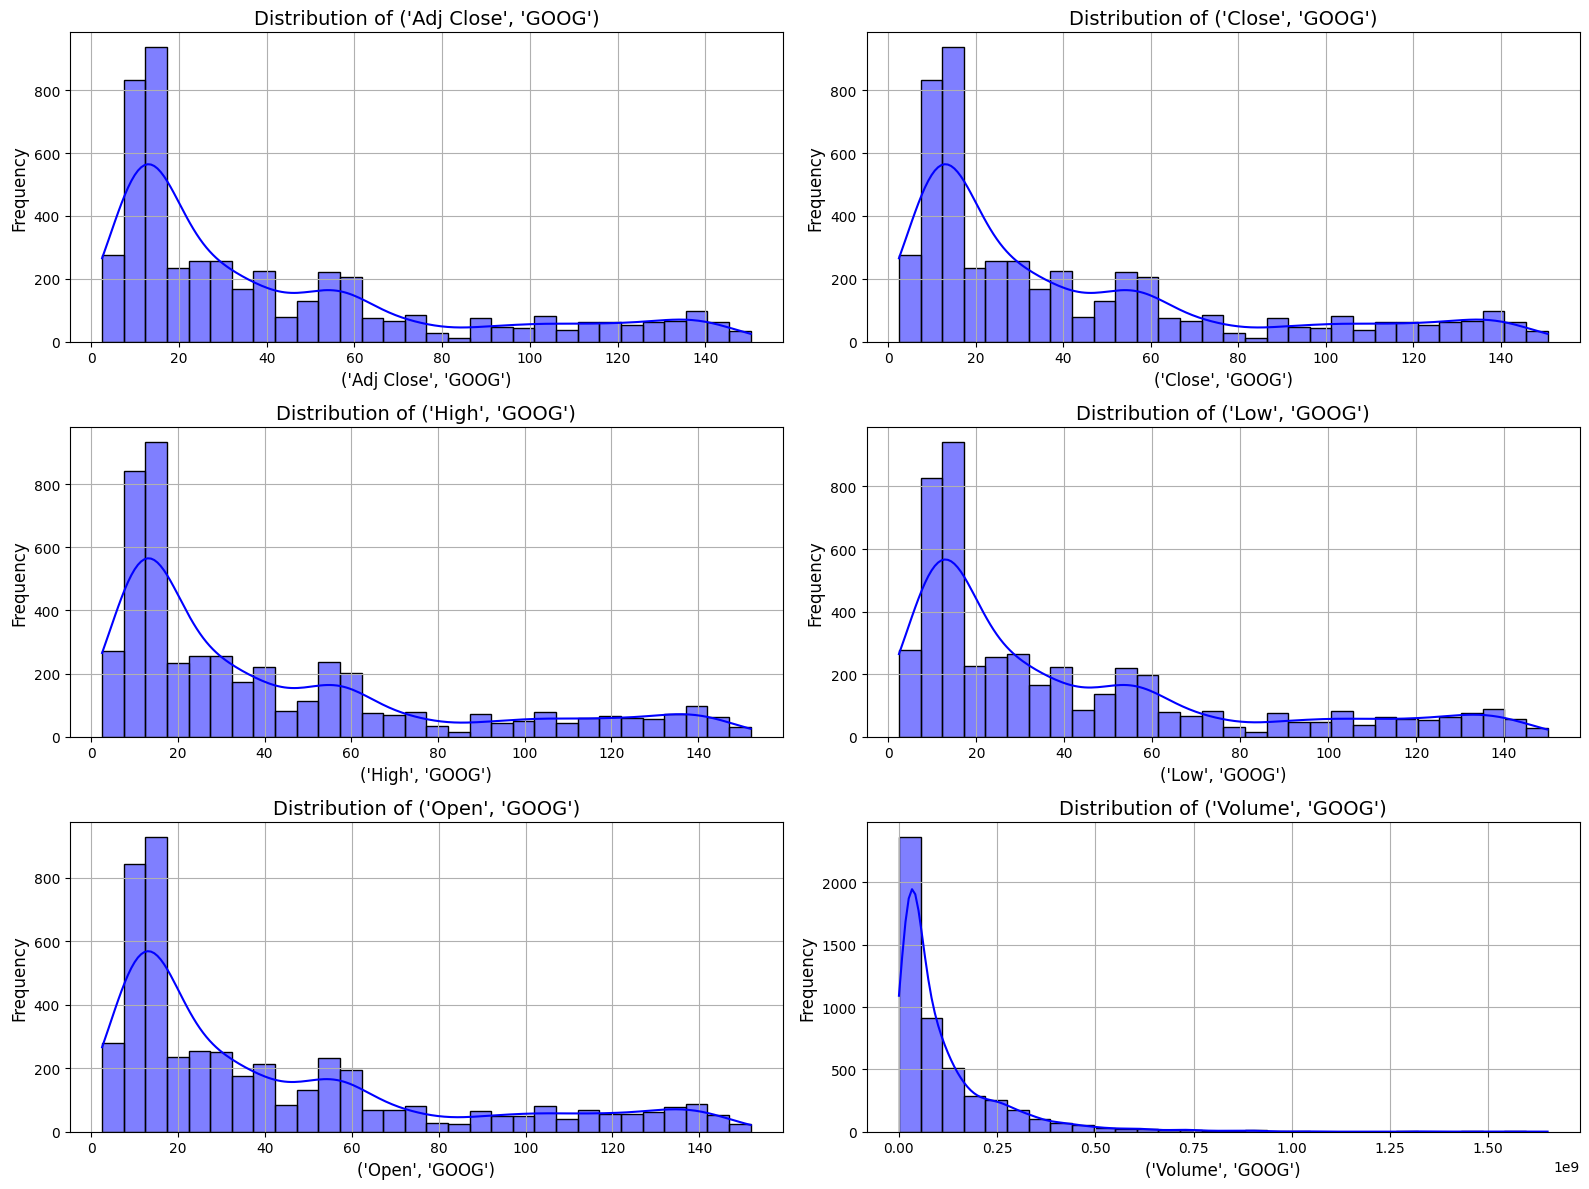

In [47]:
# List of features to plot
features = df.columns  # All columns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Loop through the features and create histograms
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Adjust the grid based on the number of features
    sns.histplot(df[feature], bins=30, kde=True, color="blue")  # Histogram with KDE overlay
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

## 2.2 Pairwise Relationships

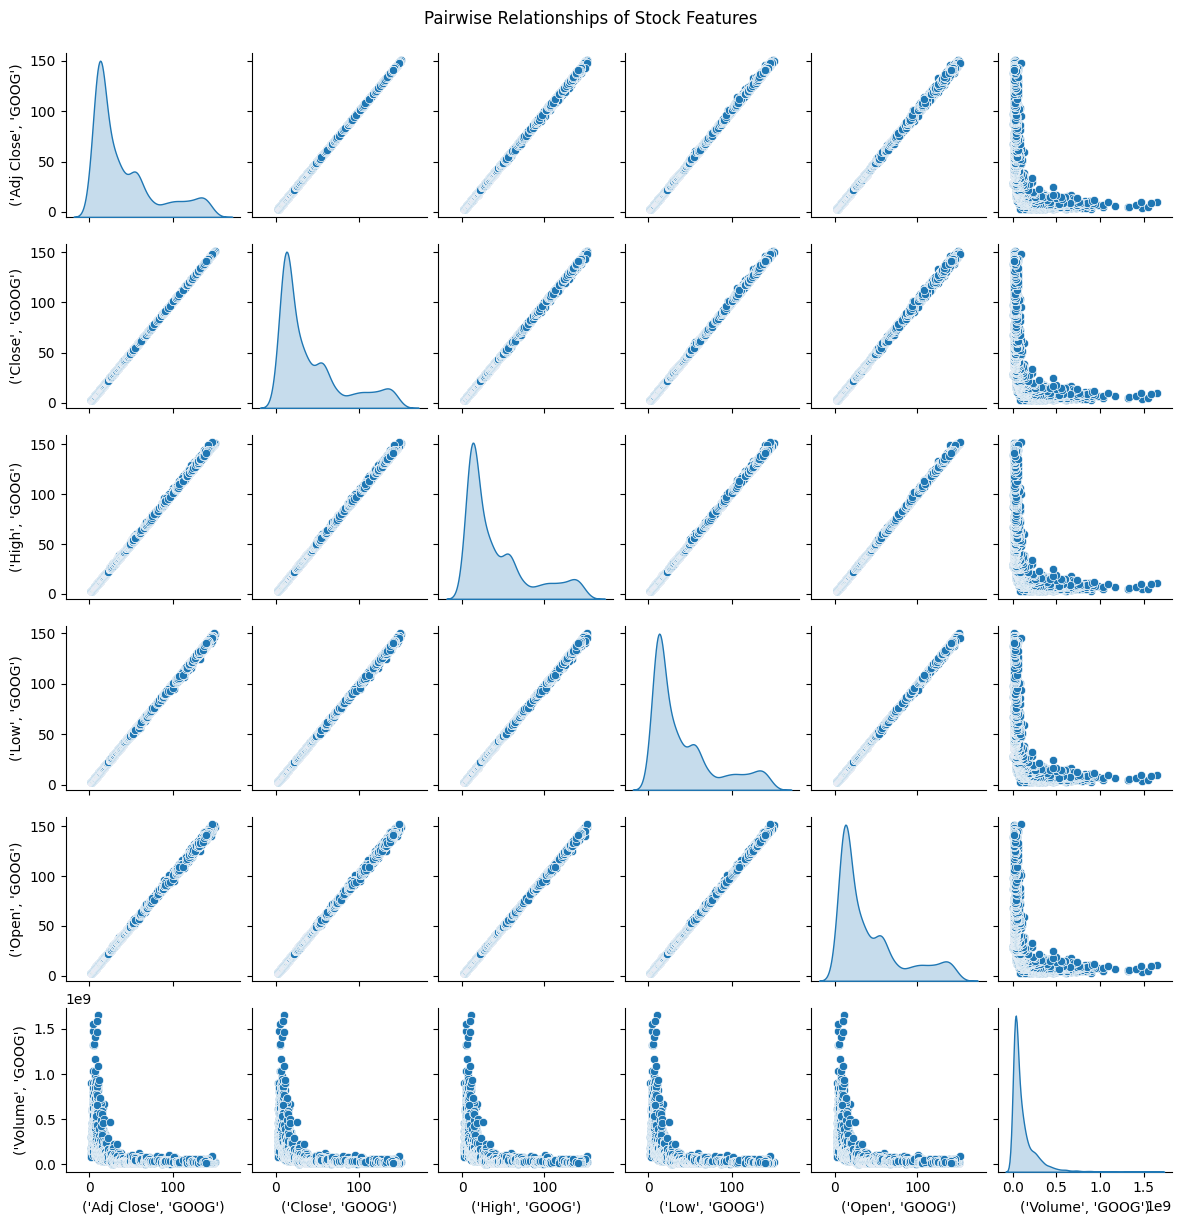

In [48]:
sns.pairplot(df[features], diag_kind='kde', height=2)
plt.suptitle("Pairwise Relationships of Stock Features", y=1.02)
plt.show()

## 2.3 Correlation Heatmap

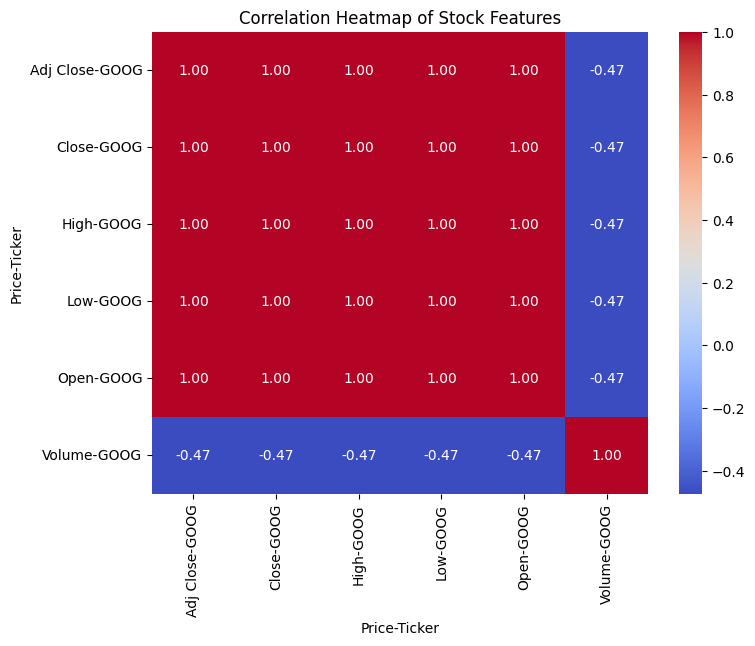

In [49]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Stock Features")
plt.show()

## 2.4 Rolling Statistics

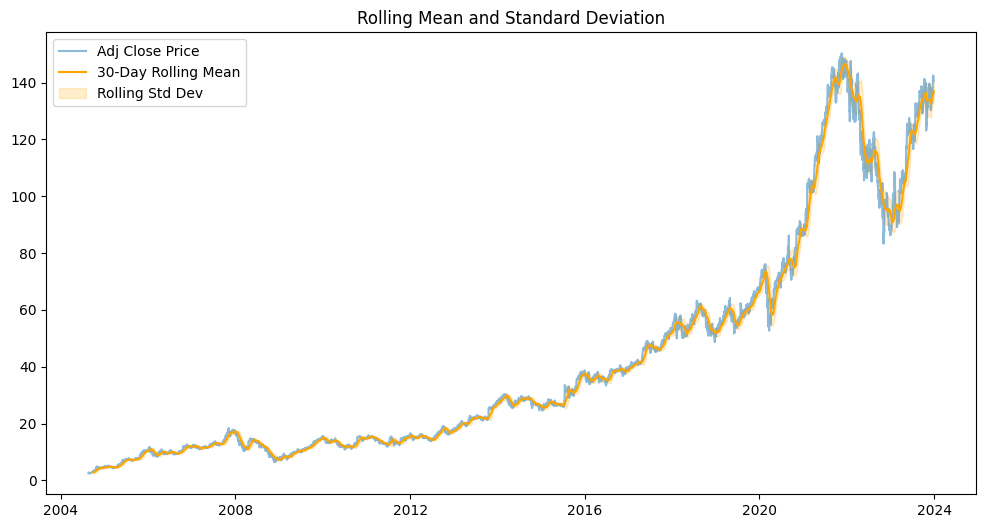

In [50]:
df['Rolling Mean'] = df['Adj Close'].rolling(window=30).mean()
df['Rolling Std'] = df['Adj Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label="Adj Close Price", alpha=0.5)
plt.plot(df['Rolling Mean'], label="30-Day Rolling Mean", color="orange")
plt.fill_between(df.index,
                 df['Rolling Mean'] - df['Rolling Std'],
                 df['Rolling Mean'] + df['Rolling Std'],
                 color='orange', alpha=0.2, label="Rolling Std Dev")
plt.title("Rolling Mean and Standard Deviation")
plt.legend()
plt.show()

# 3. Data Processing

## 3.1 Feature Selection

In [51]:
# Select only 'Adj Close' and 'Volume' and name it 'selected_data'
selected_data = df[['Adj Close', 'Volume']].copy()

# Display the first few rows of the selected DataFrame
print("Selected DataFrame with 'Adj Close' and 'Volume':")
print(selected_data.head(10))

Selected DataFrame with 'Adj Close' and 'Volume':
Price      Adj Close     Volume
Ticker          GOOG       GOOG
Date                           
2004-08-19  2.493011  897427216
2004-08-20  2.691030  458857488
2004-08-23  2.718112  366857939
2004-08-24  2.605561  306396159
2004-08-25  2.633636  184645512
2004-08-26  2.681092  142572401
2004-08-27  2.637363  124826132
2004-08-30  2.534503  104429967
2004-08-31  2.543447   98825037
2004-09-01  2.490774  183633734


## 3.2 Normalization

In [52]:
# normalized_df = normalized_df.dropna()
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected DataFrame
normalized_data = scaler.fit_transform(selected_data)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=['Adj Close', 'Volume'], index=selected_data.index)

# Display the first few rows of the normalized DataFrame
print("Normalized Selected Data:")
print(normalized_df.head(10))

Normalized Selected Data:
            Adj Close    Volume
Date                           
2004-08-19   0.000055  0.543577
2004-08-20   0.001395  0.277886
2004-08-23   0.001578  0.222151
2004-08-24   0.000817  0.185523
2004-08-25   0.001007  0.111765
2004-08-26   0.001328  0.086276
2004-08-27   0.001032  0.075525
2004-08-30   0.000336  0.063169
2004-08-31   0.000397  0.059774
2004-09-01   0.000040  0.111152


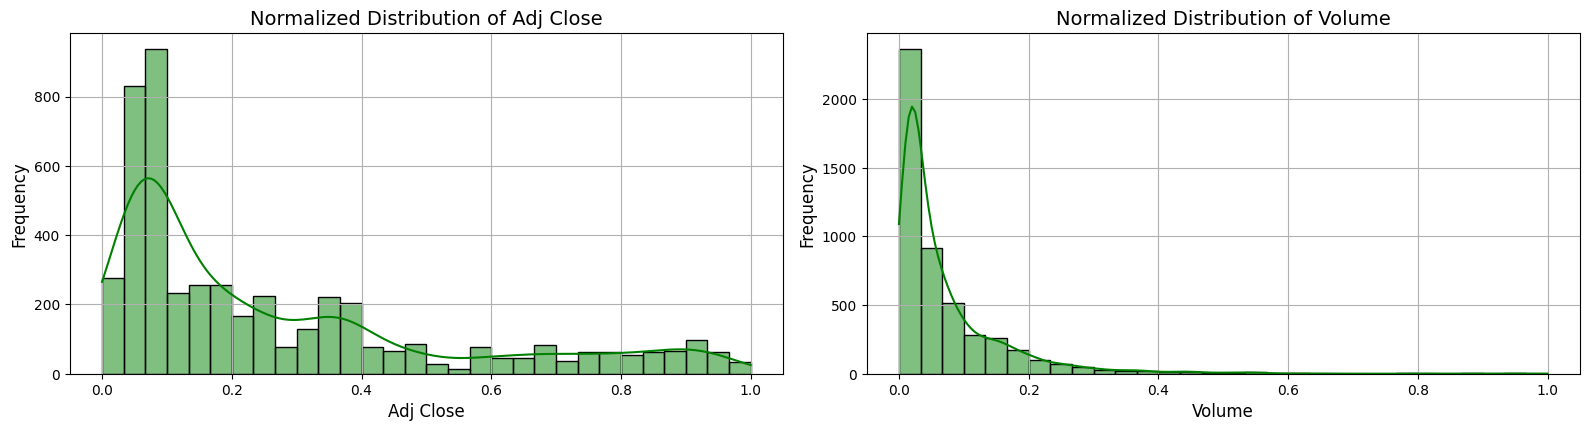

In [53]:
# Visualize the distributions of the normalized data
plt.figure(figsize=(16, 12))

for i, feature in enumerate(normalized_df.columns):
    plt.subplot(3, 2, i + 1)  # Create subplots based on the number of features
    sns.histplot(normalized_df[feature], bins=30, kde=True, color="green")  # Histogram with KDE
    plt.title(f"Normalized Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## 3.3 Spliting the Data

In [54]:
# Convert the index to a DatetimeIndex if it's not already
normalized_df.index = pd.to_datetime(normalized_df.index)

# Step 1: Split the data into training and test sets by year
training_data = normalized_df[normalized_df.index.year < 2020]  # All data before 2020 for training
test_validation_data = normalized_df[normalized_df.index.year >= 2020]  # Data from 2020 onward

# Step 2: Split test_validation_data into validation and test sets
validation_data = test_validation_data[test_validation_data.index.year == 2020]  # Use data from 2020 for validation
test_data = test_validation_data[test_validation_data.index.year > 2020]  # Use data after 2020 for final testing

# Display the dimensions of each dataset
print("Data Splits:")
print("Training Data Dimensions:", training_data.shape)
print("Validation Data Dimensions:", validation_data.shape)
print("Test Data Dimensions:", test_data.shape)

Data Splits:
Training Data Dimensions: (3869, 2)
Validation Data Dimensions: (253, 2)
Test Data Dimensions: (753, 2)


## 3.4 Preparing the Data for RNN

In [55]:
# Function to create sequences for RNN input
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :])  # N days of input
        y.append(data[i + sequence_length, 0])  # Predict the next day's Adj Close
    return np.array(X), np.array(y)

# Sequence length (N days for input)
sequence_length = 30  # Use the past 30 days to predict the next day

# Convert training, validation, and test data to NumPy arrays
training_array = training_data.values
validation_array = validation_data.values
test_array = test_data.values

# Create sequences
X_train, y_train = create_sequences(training_array, sequence_length)
X_val, y_val = create_sequences(validation_array, sequence_length)
X_test, y_test = create_sequences(test_array, sequence_length)

# Display dataset shapes
print("RNN Input Data Shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

RNN Input Data Shapes:
X_train shape: (3839, 30, 2)
y_train shape: (3839,)
X_val shape: (223, 30, 2)
y_val shape: (223,)
X_test shape: (723, 30, 2)
y_test shape: (723,)


# 4. Deep Learning Models

## 4.1 Simple RNN

### 4.1.1 Building the Model

In [56]:
# Define the Simple RNN model
model_rnn = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Sequence length and number of features
    SimpleRNN(64, activation='tanh'),  # RNN layer with 64 units
    Dense(1)  # Predict a single value (next day's Adj Close)
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model_rnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           4,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

### 4.1.1 Trainning the Model

In [57]:
# Train the model
history_rnn = model_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of epochs (adjustable)
    batch_size=32,  # Batch size (adjustable)
    verbose=1  # Print training progress
)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0128 - val_loss: 0.0018
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2347e-04 - val_loss: 0.0013
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0372e-04 - val_loss: 0.0014
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0161e-05 - val_loss: 0.0011
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.5738e-05 - val_loss: 9.6490e-04
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.6638e-05 - val_loss: 9.6716e-04
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.8855e-05 - val_loss: 7.6600e-04
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9249e-05 - val_loss: 7.6833e-04
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.9053e-05 - val_loss: 7.4875e-04
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7268e-05 - val_loss: 6.3868e-04
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6236e-05 - val_

### 4.1.3 Training and Validation Loss

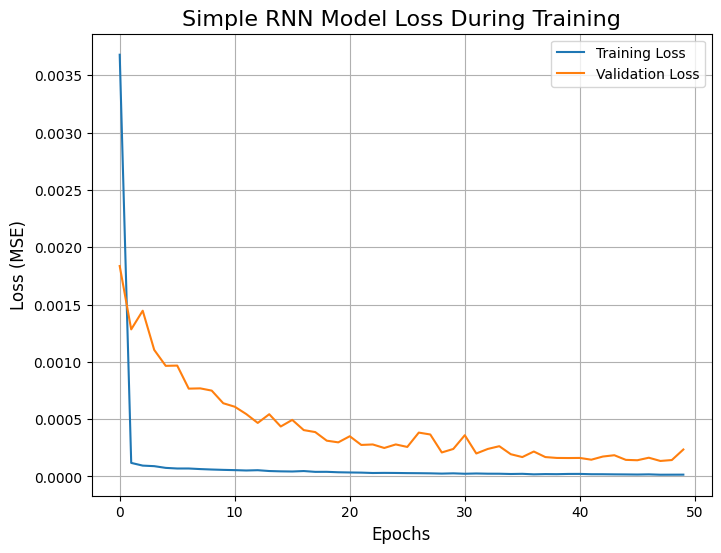

In [58]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN Model Loss During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 4.1.4 Predictions

#### 4.1.4.1 Normalized Performance Metrics

In [59]:
# Make predictions on validation data
predictions_rnn = model_rnn.predict(X_val).flatten()  # Flatten predictions to match y_val shape

# Normalized Metrics
mse_rnn = mean_squared_error(y_val, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

# Define Mean Directional Accuracy (MDA)
def mean_directional_accuracy(y_true, y_pred):
    y_true_diff = np.diff(y_true)  # Calculate differences in true values
    y_pred_diff = np.diff(y_pred)  # Calculate differences in predicted values
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff[:len(y_true_diff)])
    return np.mean(correct_direction)

mda_rnn = mean_directional_accuracy(y_val, predictions_rnn)

# Print normalized metrics
print("Normalized Metrics:")
print(f"MSE (Normalized): {mse_rnn}")
print(f"RMSE (Normalized): {rmse_rnn}")
print(f"MDA (Normalized): {mda_rnn}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Normalized Metrics:
MSE (Normalized): 0.00023501683764776813
RMSE (Normalized): 0.015330258890435221
MDA (Normalized): 0.5045045045045045


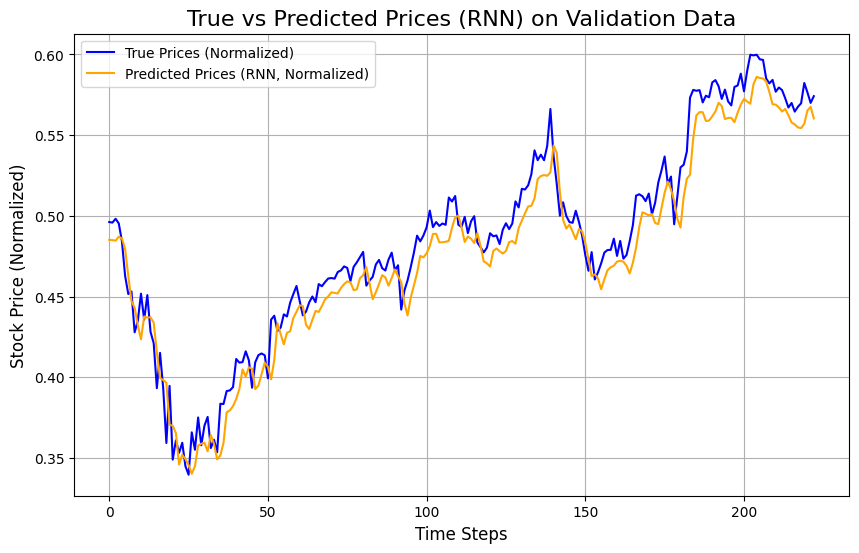

In [60]:
# Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='True Prices (Normalized)', color='blue')
plt.plot(predictions_rnn, label='Predicted Prices (RNN, Normalized)', color='orange')
plt.title('True vs Predicted Prices (RNN) on Validation Data', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price (Normalized)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 4.1.4.2 Denormalized Stock Price

In [61]:
# Denormalize predictions and true values
predictions_denormalized = scaler.inverse_transform(
    np.hstack([predictions_rnn.reshape(-1, 1), np.zeros((len(predictions_rnn), X_train.shape[2] - 1))])
)[:, 0]

y_val_denormalized = scaler.inverse_transform(
    np.hstack([y_val.reshape(-1, 1), np.zeros((len(y_val), X_train.shape[2] - 1))])
)[:, 0]

# Compute denormalized metrics
mse_rnn_denormalized = mean_squared_error(y_val_denormalized, predictions_denormalized)
rmse_rnn_denormalized = np.sqrt(mse_rnn_denormalized)
mda_rnn_denormalized = mean_directional_accuracy(y_val_denormalized, predictions_denormalized)

In [62]:
# Create a DataFrame with true and predicted prices (denormalized)
comparison_df = pd.DataFrame({
    "True Price": y_val_denormalized,
    "Predicted Price": predictions_denormalized
})

# Display the first few rows of the DataFrame
print("\nComparison of True and Predicted Prices (Denormalized):")
print(comparison_df.head(10))  # Adjust the number of rows as needed

# Save to a CSV file for further analysis (optional)
comparison_df.to_csv("predicted_vs_true_prices.csv", index=False)


Comparison of True and Predicted Prices (Denormalized):
   True Price  Predicted Price
0   75.850731        74.217321
1   75.797356        74.197493
2   76.147499        74.141350
3   75.721542        74.508819
4   74.073593        74.344636
5   70.905365        73.394872
6   69.252434        70.901220
7   69.488350        68.606435
8   65.743050        67.994516
9   66.802444        66.385661


## 4.2 LSTM

### 4.2.1 Building the Model

In [63]:
# Define the LSTM model
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Sequence length and number of features
    LSTM(64, activation='tanh'),  # LSTM layer with 64 units
    Dense(1)  # Predict a single value (next day's Adj Close)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model_lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

### 4.2.2 Trainning the Model

In [64]:
# Train the model
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of epochs (adjustable)
    batch_size=32,  # Batch size (adjustable)
    verbose=1  # Print training progress
)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0038 - val_loss: 7.8443e-04
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8267e-05 - val_loss: 5.0607e-04
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3907e-05 - val_loss: 4.1305e-04
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5339e-05 - val_loss: 4.5158e-04
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5301e-05 - val_loss: 3.7970e-04
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0564e-05 - val_loss: 3.9202e-04
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9345e-05 - val_loss: 3.5135e-04
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9423e-05 - val_loss: 3.8848e-04
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0716e-05 - val_loss: 3.5695e-04
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8453e-05 - val_loss: 3.5151e-04
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.

### 4.2.3 Training and Validation Loss

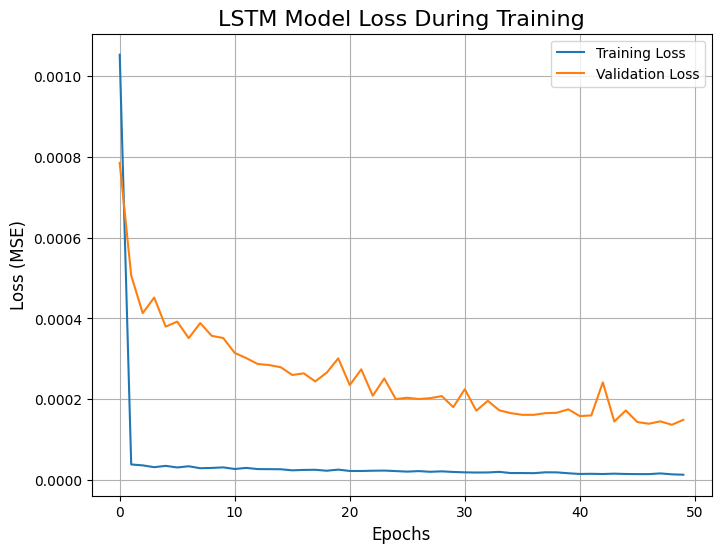

In [65]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 4.2.4 Predictions

#### 4.2.4.1 Normalized Performance Metrics

In [66]:
# Make predictions on validation data
predictions_lstm = model_lstm.predict(X_val).flatten()  # Flatten predictions to match y_val shape

# Normalized Metrics
mse_lstm = mean_squared_error(y_val, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mda_lstm = mean_directional_accuracy(y_val, predictions_lstm)

# Print normalized metrics
print("Normalized Metrics (LSTM):")
print(f"MSE (Normalized): {mse_lstm}")
print(f"RMSE (Normalized): {rmse_lstm}")
print(f"MDA (Normalized): {mda_lstm}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Normalized Metrics (LSTM):
MSE (Normalized): 0.00014936813722270505
RMSE (Normalized): 0.012221625801124212
MDA (Normalized): 0.46846846846846846


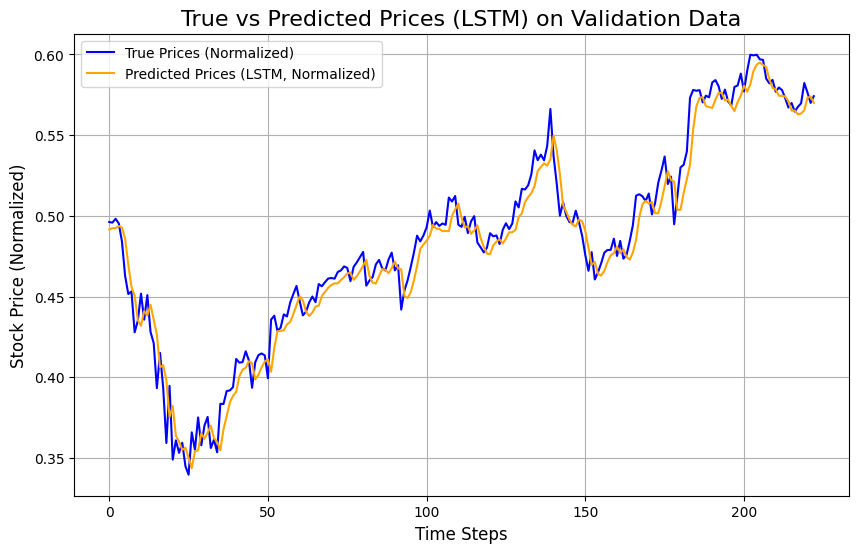

In [67]:
# Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='True Prices (Normalized)', color='blue')
plt.plot(predictions_lstm, label='Predicted Prices (LSTM, Normalized)', color='orange')
plt.title('True vs Predicted Prices (LSTM) on Validation Data', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price (Normalized)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 4.2.4.2 Denormalized Stock Prices

In [68]:
# Denormalize predictions and true values
predictions_denormalized_lstm = scaler.inverse_transform(
    np.hstack([predictions_lstm.reshape(-1, 1), np.zeros((len(predictions_lstm), X_train.shape[2] - 1))])
)[:, 0]

y_val_denormalized_lstm = scaler.inverse_transform(
    np.hstack([y_val.reshape(-1, 1), np.zeros((len(y_val), X_train.shape[2] - 1))])
)[:, 0]

# Compute denormalized metrics
mse_lstm_denormalized = mean_squared_error(y_val_denormalized_lstm, predictions_denormalized_lstm)
rmse_lstm_denormalized = np.sqrt(mse_lstm_denormalized)
mda_lstm_denormalized = mean_directional_accuracy(y_val_denormalized_lstm, predictions_denormalized_lstm)

In [69]:
# Create a DataFrame with true and predicted prices (denormalized)
comparison_df_lstm = pd.DataFrame({
    "True Price": y_val_denormalized_lstm,
    "Predicted Price": predictions_denormalized_lstm
})

# Display the first few rows of the DataFrame
print("\nComparison of True and Predicted Prices (Denormalized) for LSTM:")
print(comparison_df_lstm.head(10))  # Adjust the number of rows as needed


Comparison of True and Predicted Prices (Denormalized) for LSTM:
   True Price  Predicted Price
0   75.850731        75.169426
1   75.797356        75.285764
2   76.147499        75.292748
3   75.721542        75.483806
4   74.073593        75.340708
5   70.905365        74.313355
6   69.252434        71.969390
7   69.488350        69.910014
8   65.743050        69.120299
9   66.802444        66.862651


## 4.3 GRU

### 4.3.1 Building the Model

In [70]:
# Define the GRU model
model_gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Sequence length and number of features
    GRU(64, activation='tanh'),  # GRU layer with 64 units
    Dense(1)  # Predict a single value (next day's Adj Close)
])

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model_gru.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 64)                  │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,121 (51.25 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 0 (0.00 B)

### 4.3.2 Trainning the Model

In [71]:
# Train the model
history_gru = model_gru.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of epochs (adjustable)
    batch_size=32,  # Batch size (adjustable)
    verbose=1  # Print training progress
)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083 - val_loss: 4.1410e-04
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9913e-05 - val_loss: 3.0596e-04
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3391e-05 - val_loss: 2.8309e-04
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6123e-05 - val_loss: 2.6813e-04
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3540e-05 - val_loss: 2.8635e-04
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4350e-05 - val_loss: 2.4004e-04
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2131e-05 - val_loss: 2.7254e-04
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2216e-05 - val_loss: 2.2019e-04
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1961e-05 - val_loss: 2.1269e-04
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1172e-05 - val_loss: 2.0158e-04
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.

### 4.3.3 Training and Validation Loss

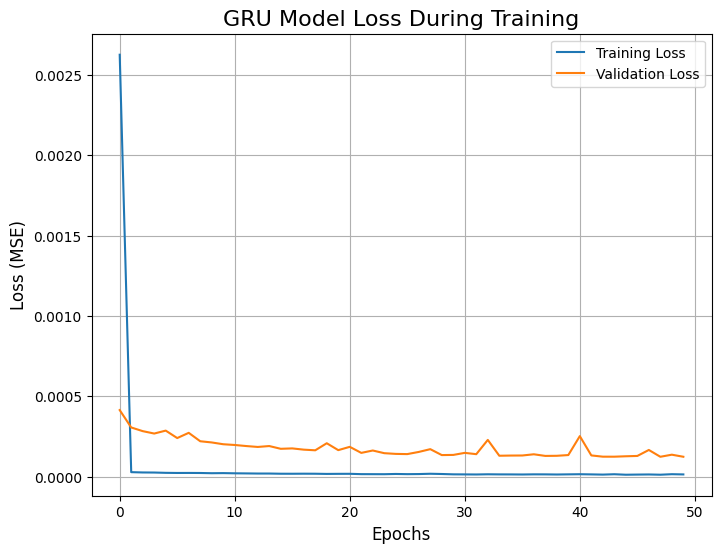

In [72]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 4.3.4 Predictions

#### 4.3.4.1 Normalized Performence metrics

In [105]:
# Make predictions on validation data
predictions_gru = model_gru.predict(X_val).flatten()  # Flatten predictions to match y_val shape

# Mean Squared Error (MSE)
mse_gru = mean_squared_error(y_val, predictions_gru)
rmse_gru = np.sqrt(mse_gru)
mda_gru = mean_directional_accuracy(y_val, predictions_gru)

# Print normalized metrics
print("Normalized Metrics (GRU):")
print(f"MSE (Normalized): {mse_gru}")
print(f"RMSE (Normalized): {rmse_gru}")
print(f"MDA (Normalized): {mda_gru}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Normalized Metrics (GRU):
MSE (Normalized): 0.00012370399858245703
RMSE (Normalized): 0.011122229928501615
MDA (Normalized): 0.46396396396396394


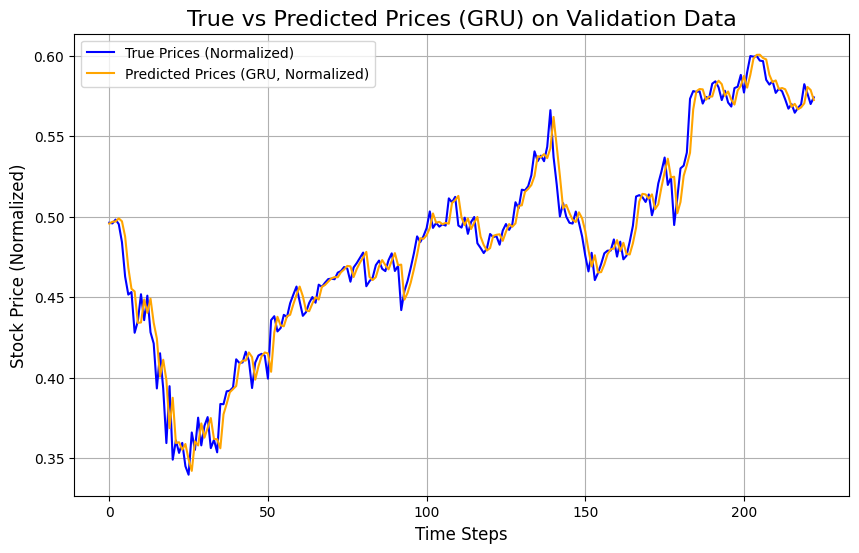

In [106]:
# Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='True Prices (Normalized)', color='blue')
plt.plot(predictions_gru, label='Predicted Prices (GRU, Normalized)', color='orange')
plt.title('True vs Predicted Prices (GRU) on Validation Data', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price (Normalized)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 4.3.4.2 Denormalized Stock Prices

In [100]:
# Denormalize predictions and true values
predictions_denormalized_gru = scaler.inverse_transform(
    np.hstack([predictions_gru.reshape(-1, 1), np.zeros((len(predictions_gru), X_train.shape[2] - 1))])
)[:, 0]

y_val_denormalized_gru = scaler.inverse_transform(
    np.hstack([y_val.reshape(-1, 1), np.zeros((len(y_val), X_train.shape[2] - 1))])
)[:, 0]

# Compute denormalized metrics
mse_gru_denormalized = mean_squared_error(y_val_denormalized_gru, predictions_denormalized_gru)
rmse_gru_denormalized = np.sqrt(mse_gru_denormalized)
mda_gru_denormalized = mean_directional_accuracy(y_val_denormalized_gru, predictions_denormalized_gru)

In [76]:
# Create a DataFrame with true and predicted prices (denormalized)
comparison_df_gru = pd.DataFrame({
    "True Price": y_val_denormalized_gru,
    "Predicted Price": predictions_denormalized_gru
})

# Display the first few rows of the DataFrame
print("\nComparison of True and Predicted Prices (Denormalized) for GRU:")
print(comparison_df_gru.head(10))  # Adjust the number of rows as needed

# Save to a CSV file for further analysis (optional)
comparison_df_gru.to_csv("predicted_vs_true_prices_gru.csv", index=False)


Comparison of True and Predicted Prices (Denormalized) for GRU:
   True Price  Predicted Price
0   75.850731        75.774339
1   75.797356        75.948036
2   76.147499        75.971469
3   75.721542        76.256948
4   74.073593        75.987055
5   70.905365        74.591145
6   69.252434        71.729465
7   69.488350        69.784448
8   65.743050        69.542703
9   66.802444        66.657334


# 5. Hyper-Parameter Optimization

## 5.1 Best Model Identification

In [77]:
# Define performance metrics for each model using the variables
performance_metrics = {
    "Simple RNN": {"MSE": mse_rnn, "RMSE": rmse_rnn, "MDA": mda_rnn},
    "LSTM": {"MSE": mse_lstm, "RMSE": rmse_lstm, "MDA": mda_lstm},
    "GRU": {"MSE": mse_gru, "RMSE": rmse_gru, "MDA": mda_gru}
}

# Define weights for metrics (adjust if needed)
weights = {"MSE": 0.5, "RMSE": 0.3, "MDA": 0.2}  # Higher weight to MSE and RMSE since they represent error

# Function to compute weighted score for each model
def compute_score(metrics, weights):
    # Normalize the metrics for comparison
    mse_score = 1 / metrics["MSE"]  # Lower MSE is better
    rmse_score = 1 / metrics["RMSE"]  # Lower RMSE is better
    mda_score = metrics["MDA"]  # Higher MDA is better

    # Compute weighted score
    weighted_score = (
        weights["MSE"] * mse_score +
        weights["RMSE"] * rmse_score +
        weights["MDA"] * mda_score
    )
    return weighted_score

# Compute scores for each model
scores = {model: compute_score(metrics, weights) for model, metrics in performance_metrics.items()}

# Find the best model based on the highest score
best_model = max(scores, key=scores.get)

# Print the results
print("Model Performance Scores:")
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

print("\nBest Model:", best_model)

Model Performance Scores:
Simple RNN: 2147.1772
LSTM: 3372.0745
GRU: 4068.9723

Best Model: GRU


## 5.2 Optimization for GRU


### 5.2.1 Hyperparameter Space Definition and Random Sampling for Optimization

In [78]:
import tensorflow as tf
from sklearn.model_selection import ParameterSampler
import numpy as np

# Define the hyperparameter space
param_grid = {
    "units": [32, 64, 128],
    "layers": [1, 2],
    "dropout": [0.1, 0.2, 0.3],
    "batch_size": [16, 32, 64],
    "learning_rate": [0.001, 0.01, 0.1],
    "epochs": [20, 50, 100]
}

# Randomly sample 10 combinations from the parameter grid
random_combinations = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

### 5.2.2 Function to Build, Train, and Evaluate GRU Model with Specified Hyperparameters

In [79]:
def build_and_train_gru(params, X_train, y_train, X_val, y_val):
    # Unpack parameters
    units = params["units"]
    layers = params["layers"]
    dropout = params["dropout"]
    batch_size = params["batch_size"]
    learning_rate = params["learning_rate"]
    epochs = params["epochs"]

    # Build the GRU model
    model = Sequential()
    for i in range(layers):
        return_sequences = i < layers - 1  # Only last layer should not return sequences
        model.add(GRU(units, activation='tanh', return_sequences=return_sequences))
        model.add(Dropout(dropout))
    model.add(Dense(1))  # Final Dense layer for output

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # Evaluate the model
    val_loss = history.history['val_loss'][-1]  # Final validation loss
    return model, val_loss

### 5.2.3 Loop to Find the Best GRU Model via Hyperparameter Search

In [90]:
best_model = None
best_params = None
best_val_loss = float('inf')

# Loop through sampled hyperparameter combinations
for i, params in enumerate(random_combinations):
    print(f"Testing combination {i+1}/{len(random_combinations)}: {params}")
    model, val_loss = build_and_train_gru(params, X_train, y_train, X_val, y_val)
    print(f"Validation Loss: {val_loss:.6f}")

    # Update best model if current one is better
    if val_loss < best_val_loss:
        best_model = model
        best_params = params
        best_val_loss = val_loss

print("\nBest Hyperparameters:", best_params)
print("Best Validation Loss:", best_val_loss)

Testing combination 1/10: {'units': 32, 'learning_rate': 0.1, 'layers': 1, 'epochs': 100, 'dropout': 0.2, 'batch_size': 64}
Validation Loss: 0.002121
Testing combination 2/10: {'units': 64, 'learning_rate': 0.001, 'layers': 2, 'epochs': 100, 'dropout': 0.2, 'batch_size': 32}
Validation Loss: 0.000224
Testing combination 3/10: {'units': 128, 'learning_rate': 0.1, 'layers': 2, 'epochs': 100, 'dropout': 0.2, 'batch_size': 64}
Validation Loss: 0.099689
Testing combination 4/10: {'units': 64, 'learning_rate': 0.1, 'layers': 2, 'epochs': 20, 'dropout': 0.3, 'batch_size': 64}
Validation Loss: 0.083233
Testing combination 5/10: {'units': 64, 'learning_rate': 0.01, 'layers': 1, 'epochs': 100, 'dropout': 0.1, 'batch_size': 64}
Validation Loss: 0.000148
Testing combination 6/10: {'units': 32, 'learning_rate': 0.1, 'layers': 2, 'epochs': 50, 'dropout': 0.3, 'batch_size': 64}
Validation Loss: 0.021914
Testing combination 7/10: {'units': 64, 'learning_rate': 0.01, 'layers': 2, 'epochs': 50, 'dropout

## 5.3 Prediction with the Best Model

In [91]:
# Make predictions with the best model
predictions_gru_optimized = best_model.predict(X_val).flatten()

# Compute performance metrics
mse_gru_optimized = mean_squared_error(y_val, predictions_gru_optimized)
rmse_gru_optimized = np.sqrt(mse_gru_optimized)
mda_gru_optimized = mean_directional_accuracy(y_val, predictions_gru_optimized)

print("Optimized GRU Metrics:")
print(f"MSE: {mse_gru_optimized}")
print(f"RMSE: {rmse_gru_optimized}")
print(f"MDA: {mda_gru_optimized}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Optimized GRU Metrics:
MSE: 0.00014751813264187534
RMSE: 0.01214570428760207
MDA: 0.42792792792792794


# 6. Final Outcome

## 6.1 Training the Model with the Best Parameters

In [92]:
# Unpack the best hyperparameters
final_units = best_params["units"]
final_layers = best_params["layers"]
final_dropout = best_params["dropout"]
final_batch_size = best_params["batch_size"]
final_learning_rate = best_params["learning_rate"]
final_epochs = best_params["epochs"]

# Build the final GRU model
final_model = Sequential()
for i in range(final_layers):
    return_sequences = i < final_layers - 1  # Only the last layer should not return sequences
    final_model.add(GRU(final_units, activation='tanh', return_sequences=return_sequences))
    final_model.add(Dropout(final_dropout))
final_model.add(Dense(1))  # Final Dense layer for output

# Compile the model
final_optimizer = tf.keras.optimizers.Adam(learning_rate=final_learning_rate)
final_model.compile(optimizer=final_optimizer, loss='mean_squared_error')

# Display the model summary
final_model.summary()

# Train the final model
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=final_epochs,
    batch_size=final_batch_size,
    verbose=1
)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_42 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - val_loss: 1.8068e-04
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5621e-04 - val_loss: 1.5291e-04
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1047e-04 - val_loss: 1.6417e-04
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0159e-04 - val_loss: 2.3641e-04
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5465e-05 - val_loss: 1.7246e-04
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0068e-05 - val_loss: 1.5221e-04
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8818e-05 - val_loss: 1.3095e-04
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9692e-05 - val_loss: 1.2878e-04
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2340e-05 - val_loss: 1.2599e-04
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7709e-05 - val_loss: 1.7896e-04
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7603e-05 - 

## 6.2 Training and Validation Loss

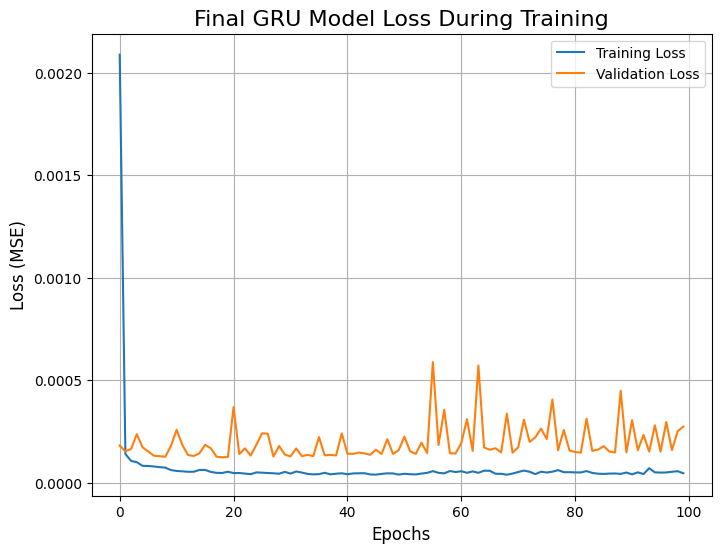

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Final GRU Model Loss During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 6.3 Prediction with Test Data

### 6.3.1 Normalized Performance Metrics

In [94]:
# Make predictions on test data
predictions_test = final_model.predict(X_test).flatten()  # Flatten predictions to match y_test shape

# Compute normalized performance metrics
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
mda_test = mean_directional_accuracy(y_test, predictions_test)

# Print normalized metrics
print("Test Data Performance Metrics (Normalized):")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MDA: {mda_test}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Data Performance Metrics (Normalized):
MSE: 0.0017664887976228307
RMSE: 0.04202961809989273
MDA: 0.48614958448753465


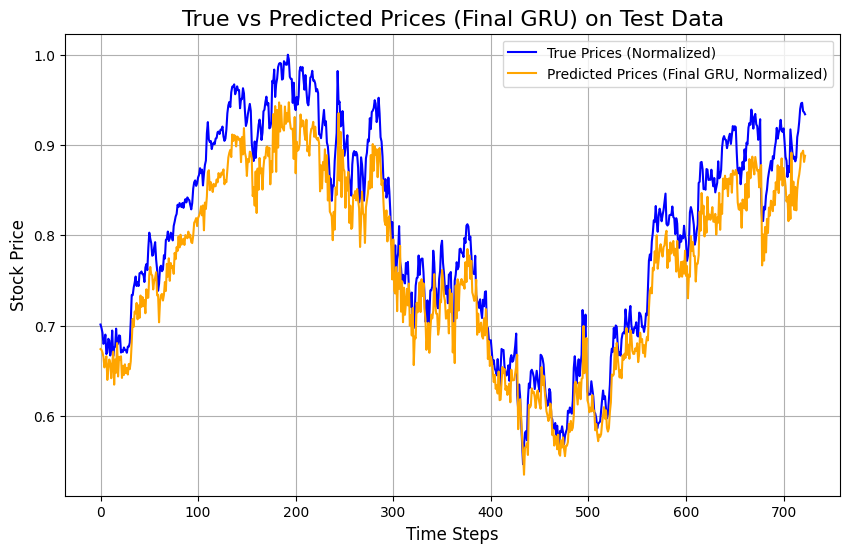

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Prices (Normalized)', color='blue')
plt.plot(predictions_test, label='Predicted Prices (Final GRU, Normalized)', color='orange')
plt.title('True vs Predicted Prices (Final GRU) on Test Data', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 6.3.2 Comparison with Base Model by Doing Prediction with Test Data

In [107]:
# Make predictions on validation data
predictions_gru = model_gru.predict(X_test).flatten()  # Flatten predictions to match y_val shape

# Mean Squared Error (MSE)
mse_gru = mean_squared_error(y_test, predictions_gru)
rmse_gru = np.sqrt(mse_gru)
mda_gru = mean_directional_accuracy(y_test, predictions_gru)

# Print normalized metrics
print("Normalized Metrics (GRU):")
print(f"MSE (Normalized): {mse_gru}")
print(f"RMSE (Normalized): {rmse_gru}")
print(f"MDA (Normalized): {mda_gru}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Normalized Metrics (GRU):
MSE (Normalized): 0.00025539973435110153
RMSE (Normalized): 0.015981230689502655
MDA (Normalized): 0.5138504155124654


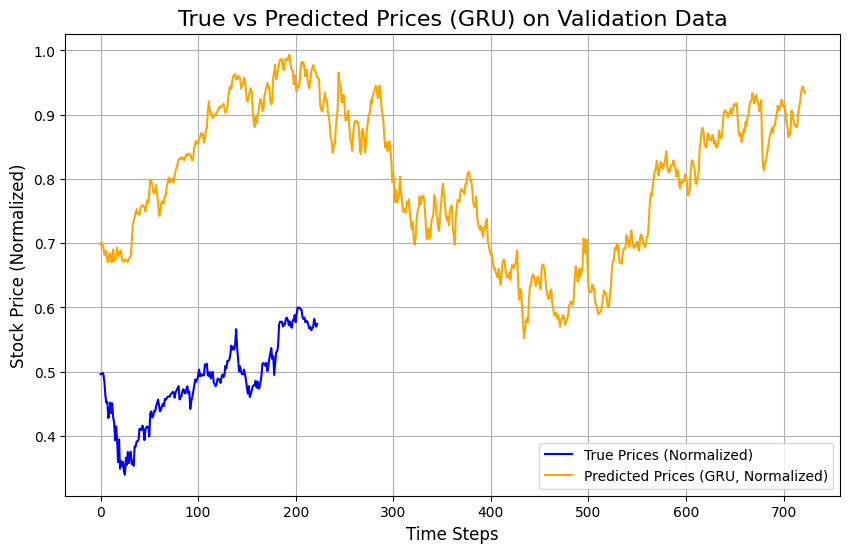

In [108]:
# Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='True Prices (Normalized)', color='blue')
plt.plot(predictions_gru, label='Predicted Prices (GRU, Normalized)', color='orange')
plt.title('True vs Predicted Prices (GRU) on Validation Data', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price (Normalized)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 6.3.3 Denormalized Stock Prices

In [101]:
# Denormalize predictions and true values
predictions_test_denormalized = scaler.inverse_transform(
    np.hstack([predictions_test.reshape(-1, 1), np.zeros((len(predictions_test), X_train.shape[2] - 1))])
)[:, 0]

y_test_denormalized = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), X_train.shape[2] - 1))])
)[:, 0]

# Compute denormalized performance metrics
mse_test_denormalized = mean_squared_error(y_test_denormalized, predictions_test_denormalized)
rmse_test_denormalized = np.sqrt(mse_test_denormalized)
mda_test_denormalized = mean_directional_accuracy(y_test_denormalized, predictions_test_denormalized)

In [102]:
# Create a DataFrame with true and predicted prices (denormalized)
test_comparison_df = pd.DataFrame({
    "True Price": y_test_denormalized,
    "Predicted Price": predictions_test_denormalized
})

# Display the first few rows of the DataFrame
print("\nComparison of True and Predicted Prices (Denormalized) on Test Data:")
print(test_comparison_df.head(10))  # Adjust the number of rows as needed

# Save to a CSV file for further analysis (optional)
test_comparison_df.to_csv("final_test_predicted_vs_true_prices.csv", index=False)


Comparison of True and Predicted Prices (Denormalized) on Test Data:
   True Price  Predicted Price
0  106.154800       102.137955
1  105.600662       102.003048
2  104.799629       101.587928
3  102.991074       100.855669
4  103.289337        99.133868
5  104.501862       100.122123
6  101.319183       100.947781
7  101.593506        97.081886
8  103.820534        99.070310
9  103.537727       100.430537
